In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo

# Load Data

In [92]:

# fetch dataset 
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes) 
X = adult.data.features
y = adult.data.targets

# metadata 
print(adult.metadata)

# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [93]:
print(adult.data.keys())

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])


In [94]:
print(adult.data.original)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

# Understanding

In [95]:
df = adult.data.original
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [96]:
df.head(200)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23,Private,197387,5th-6th,3,Married-civ-spouse,Transport-moving,Other-relative,White,Male,0,0,40,Mexico,<=50K
196,36,Private,99374,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
197,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,14084,0,55,United-States,>50K
198,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States,>50K


In [97]:
df.shape

(48842, 15)

In [98]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [99]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

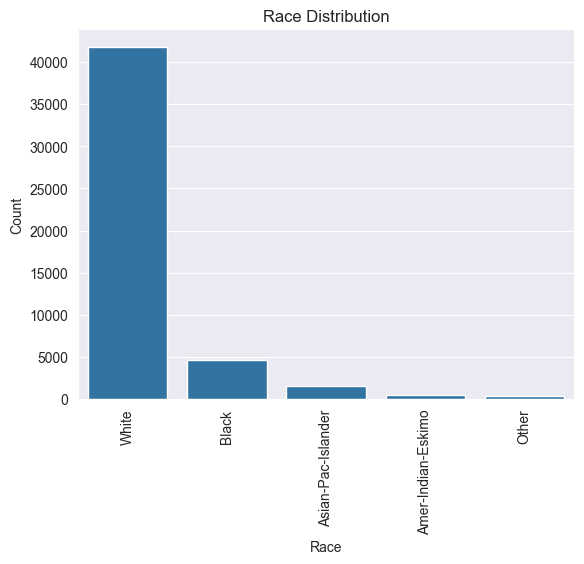

In [100]:
#Chart 'Race Distribution'
race_counts = df["race"].value_counts()

sns.barplot(x=race_counts.index, y=race_counts.values)

plt.xticks(rotation=90)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Distribution')
plt.show()

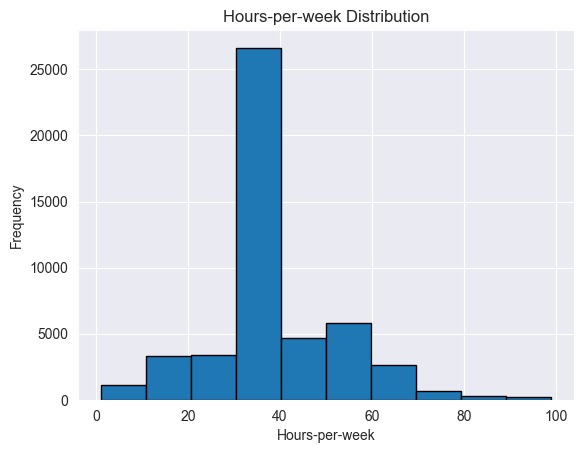

In [101]:
#Chart 'Hours-per-week Distribution'
plt.hist(df["hours-per-week"], edgecolor='black')  
plt.xlabel('Hours-per-week')
plt.ylabel('Frequency')
plt.title('Hours-per-week Distribution')
plt.show()

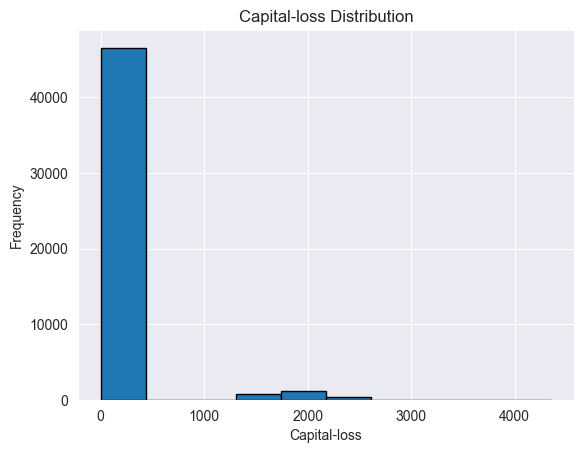

In [102]:
#Chart 'Capital-loss Distribution'
plt.hist(df["capital-loss"], edgecolor='black')
plt.xlabel('Capital-loss')
plt.ylabel('Frequency')
plt.title('Capital-loss Distribution')
plt.show()

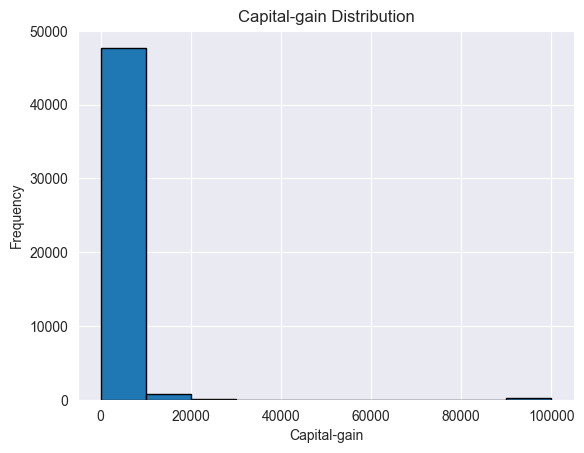

In [103]:
#Chart 'Capital-gain Distribution '
plt.hist(df["capital-gain"], edgecolor='black')
plt.xlabel('Capital-gain')
plt.ylabel('Frequency')
plt.title('Capital-gain Distribution')
plt.show()

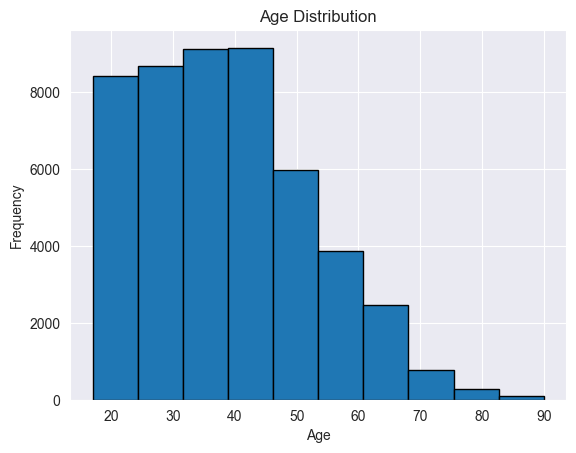

In [104]:
#Chart 'Age Distribution'
plt.hist(df["age"], bins=10, edgecolor='black') 
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

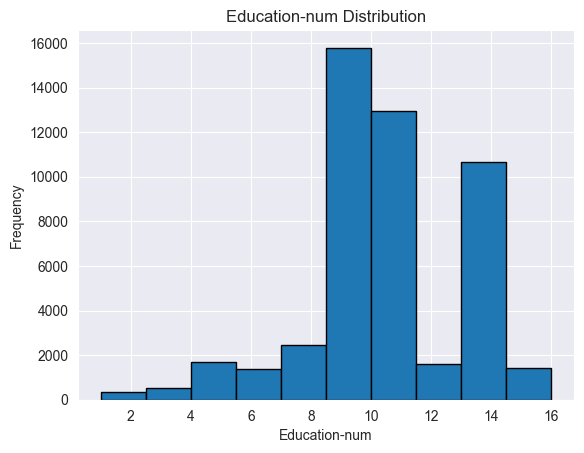

In [105]:
#Chart 'Education-num Distribution'
plt.hist(df['education-num'], bins=10, edgecolor='black')
plt.xlabel('Education-num')
plt.ylabel('Frequency')
plt.title('Education-num Distribution')
plt.show()

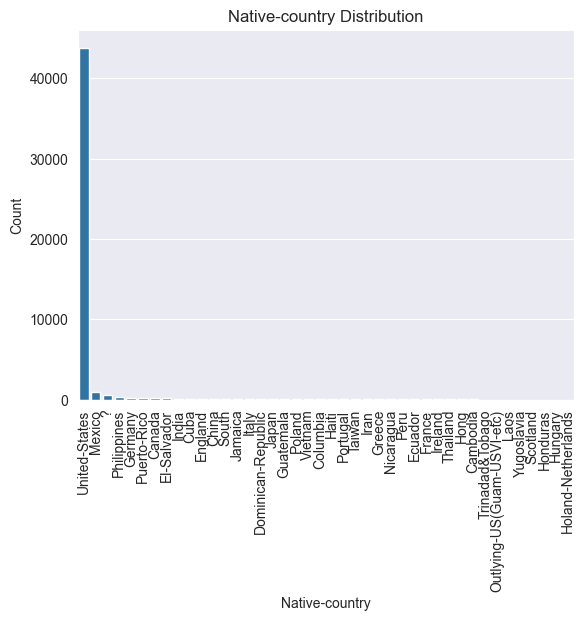

In [106]:
#Chart 'Native-country Distribution'
country_counts = df["native-country"].value_counts()

sns.barplot(x=country_counts.index, y=country_counts.values)

plt.xticks(rotation=90)
plt.xlabel('Native-country')
plt.ylabel('Count')
plt.title('Native-country Distribution')
plt.show()

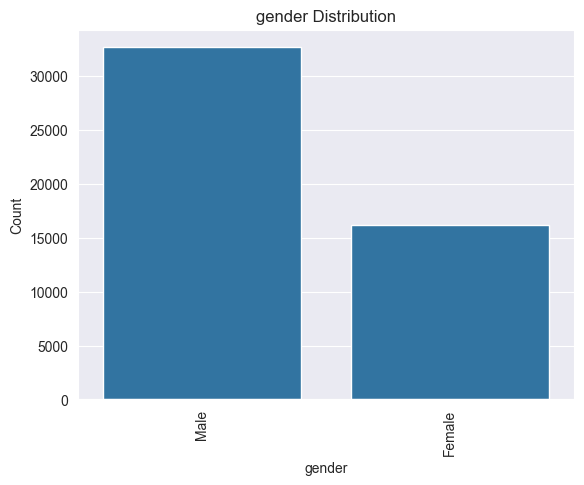

In [107]:
#Chart 'gender Distribution'
gender_counts = df["sex"].value_counts()

sns.barplot(x=gender_counts.index, y=gender_counts.values)

plt.xticks(rotation=90)
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('gender Distribution')
plt.show()

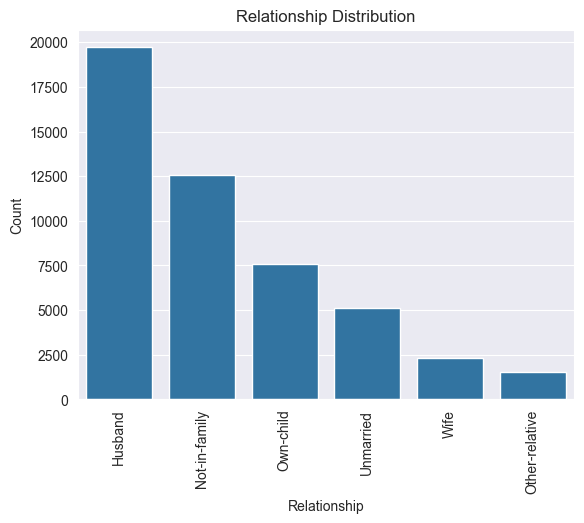

In [108]:
#Chart 'Relationship Distribution'
relationship_counts = df['relationship'].value_counts()

sns.barplot(x= relationship_counts.index, y=relationship_counts.values)

plt.xticks(rotation = 90)
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Relationship Distribution')
plt.show()

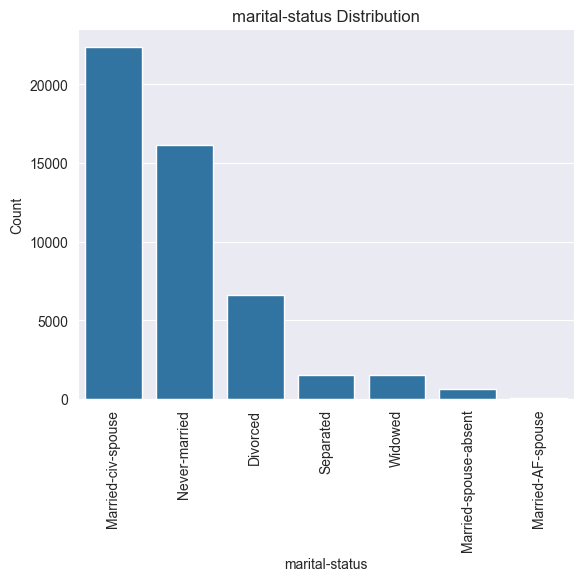

In [109]:
#Chart 'Marital-status Distribution'
m_status_counts = df["marital-status"].value_counts()

sns.barplot(x=m_status_counts.index, y=m_status_counts.values)

plt.xticks(rotation=90)
plt.xlabel('marital-status')
plt.ylabel('Count')
plt.title('marital-status Distribution')
plt.show()

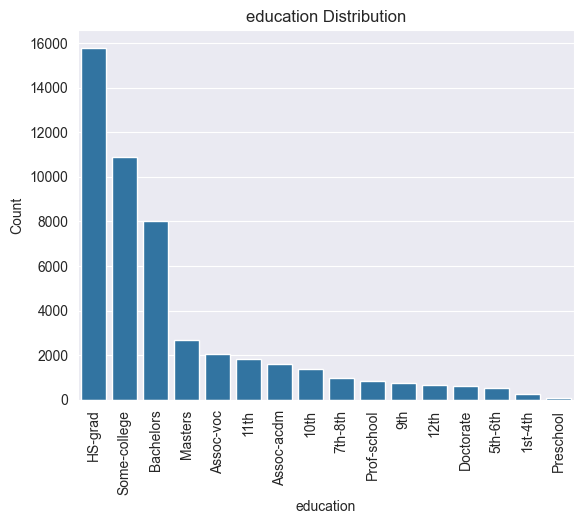

In [110]:
education_counts = df["education"].value_counts()

sns.barplot(x=education_counts.index, y=education_counts.values)

plt.xticks(rotation=90)
plt.xlabel('education')
plt.ylabel('Count')
plt.title('education Distribution')
plt.show()

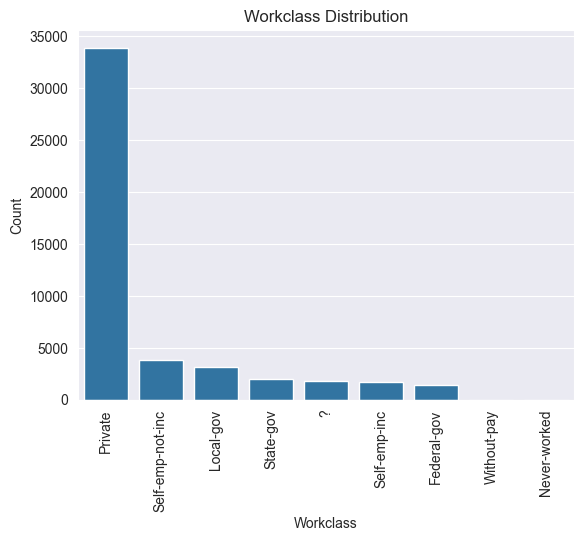

In [111]:
workclass_counts = df["workclass"].value_counts()

sns.barplot(x=workclass_counts.index, y=workclass_counts.values)

plt.xticks(rotation=90)
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Workclass Distribution')
plt.show()

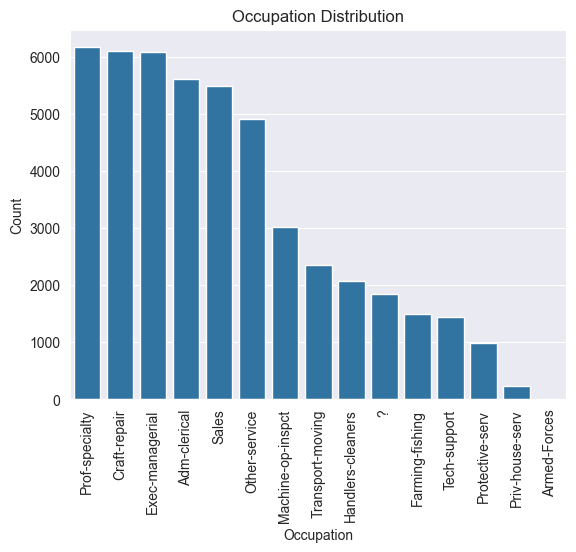

In [112]:
occupation_counts = df['occupation'].value_counts()

sns.barplot(x=occupation_counts.index, y=occupation_counts.values)

plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution')
plt.show()

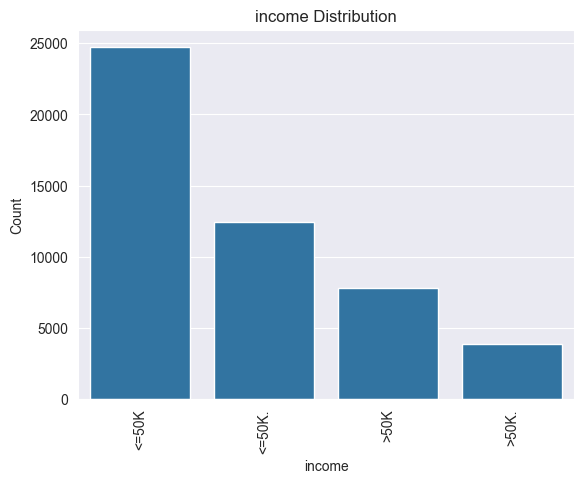

In [113]:
income_counts = df["income"].value_counts()

sns.barplot(x=income_counts.index, y=income_counts.values)

plt.xticks(rotation=90)
plt.xlabel('income')
plt.ylabel('Count')
plt.title('income Distribution')
plt.show()

# Data Cleaning

In [114]:
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [115]:
#replace '?'
df['workclass'] = df['workclass'].apply(lambda x: 'Private' if x == '?' else x)

df['occupation'] = df['occupation'].apply(lambda x: 'Prof-specialty' if x == '?' else x)

df["native-country"] = df["native-country"].apply(lambda x: "United-States" if x == "?" else x)

In [116]:
#remove '.' from column 'income'
df['income'] = df['income'].str.replace('.', '')

In [117]:
print(df['income'].value_counts().index)

Index(['<=50K', '>50K'], dtype='object', name='income')


In [118]:
missing_values = df.isnull().sum()
print(missing_values)

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


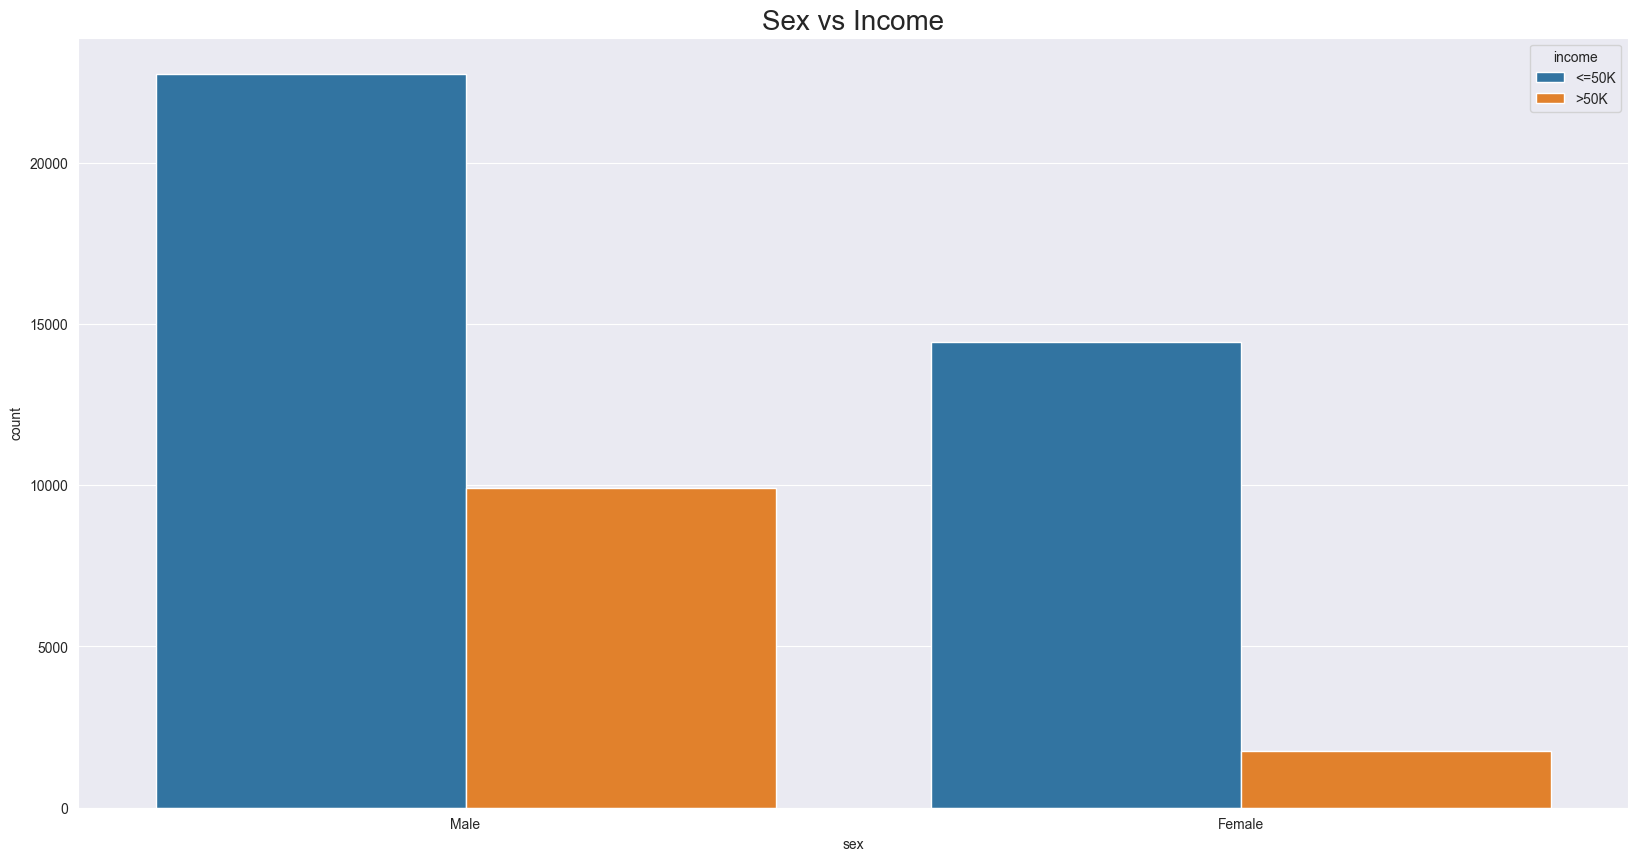

In [119]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x = df['sex'], data = df, hue = df['income'], ax=ax)
plt.title('Sex vs Income', fontsize = 20, fontweight = 30)
plt.show()

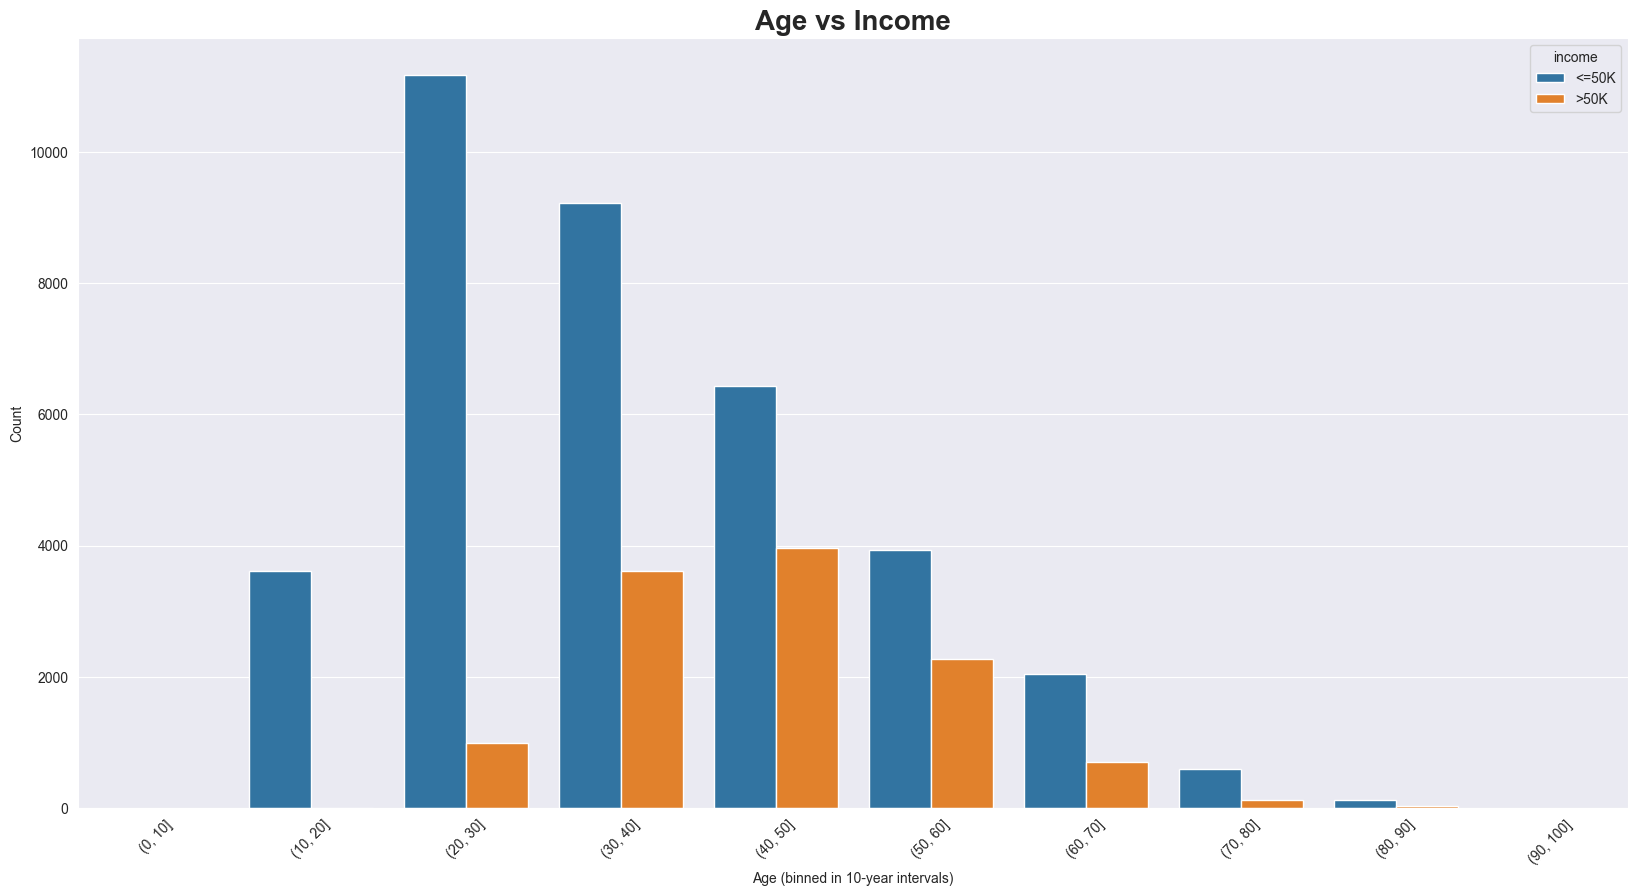

In [120]:
import pandas as pd
df['age_bin'] = pd.cut(df['age'], bins=range(0, 101, 10))

# Plotting
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x = df['age_bin'], data=df, hue=df['income'], ax=ax)
plt.title('Age vs Income', fontsize=20, fontweight='bold')
plt.xlabel('Age (binned in 10-year intervals)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [121]:
df = df.drop(columns=['age_bin'])

# Feature Engineering

In [122]:
print(df['workclass'].value_counts().index)

Index(['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc',
       'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype='object', name='workclass')


In [123]:
label_encoder = LabelEncoder()

df['workclass'] = label_encoder.fit_transform(df['workclass'])

print(df['workclass'])

0        6
1        5
2        3
3        3
4        3
        ..
48837    3
48838    8
48839    3
48840    3
48841    4
Name: workclass, Length: 48842, dtype: int64


In [124]:
print(df['education'].value_counts().index)
df.nunique()

Index(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th',
       'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th',
       'Doctorate', '5th-6th', '1st-4th', 'Preschool'],
      dtype='object', name='education')


age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
income                2
dtype: int64

In [125]:
#Delete columms 'education'
df=df.drop('education', axis=1)

In [126]:
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
income                2
dtype: int64

In [127]:
label_encoder = LabelEncoder()

df['relationship'] = label_encoder.fit_transform(df['relationship'])

print(df['relationship'])

0        1
1        0
2        1
3        0
4        5
        ..
48837    1
48838    2
48839    0
48840    3
48841    0
Name: relationship, Length: 48842, dtype: int64


In [128]:
label_encoder = LabelEncoder()

df['race'] = label_encoder.fit_transform(df['race'])

print(df['race'])

0        4
1        4
2        4
3        2
4        2
        ..
48837    4
48838    2
48839    4
48840    1
48841    4
Name: race, Length: 48842, dtype: int64


In [129]:
label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])

print(df['sex'])

0        1
1        1
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    1
48840    1
48841    1
Name: sex, Length: 48842, dtype: int64


In [130]:
label_encoder = LabelEncoder()

df['native-country'] = label_encoder.fit_transform(df['native-country'])

print(df['native-country'])

0        38
1        38
2        38
3        38
4         4
         ..
48837    38
48838    38
48839    38
48840    38
48841    38
Name: native-country, Length: 48842, dtype: int64


In [131]:
label_encoder = LabelEncoder()

df['marital-status'] = label_encoder.fit_transform(df['marital-status'])

print(df['marital-status'])

0        4
1        2
2        0
3        2
4        2
        ..
48837    0
48838    6
48839    2
48840    0
48841    2
Name: marital-status, Length: 48842, dtype: int64


In [132]:
label_encoder = LabelEncoder()

df['occupation'] = label_encoder.fit_transform(df['occupation'])

print(df['occupation'])

0         0
1         3
2         5
3         5
4         9
         ..
48837     9
48838    14
48839     9
48840     0
48841     3
Name: occupation, Length: 48842, dtype: int64


In [133]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
print(df['income'])

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64


In [134]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,13,2,9,5,2,0,0,0,40,4,0


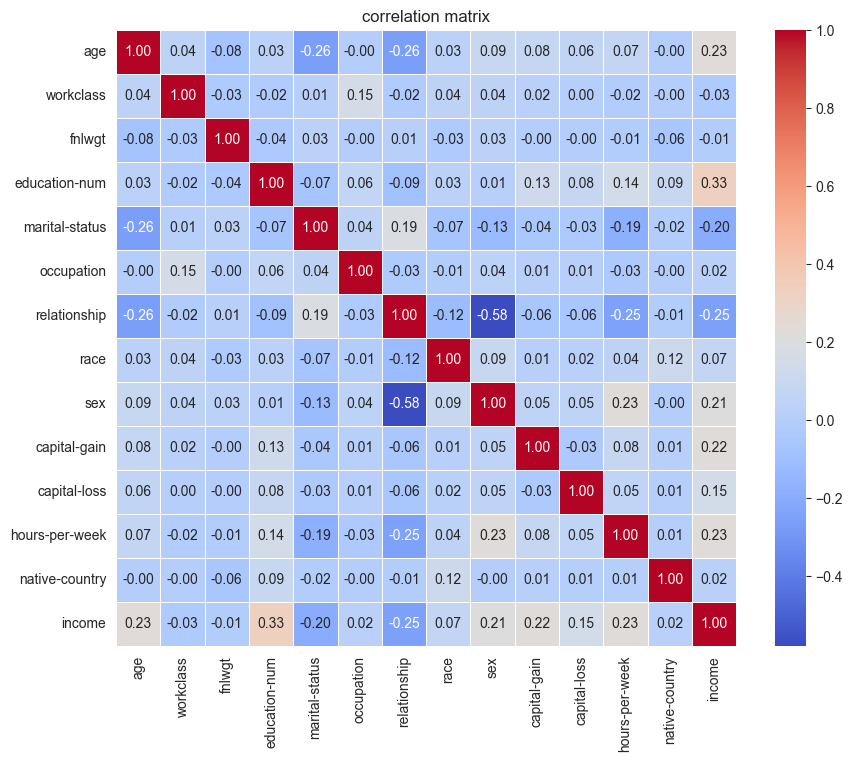

In [135]:
correlation_matrix = df.corr(method='pearson')
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlation matrix')
plt.show()

In [136]:
print(df['income'].value_counts().index)

Index([0, 1], dtype='int64', name='income')


In [137]:
occupation_income_ratios = df.groupby('occupation')['income'].value_counts(normalize=True).unstack()

occupation_income_ratios.columns = ['Income <=50K (%)', 'Income >50K (%)']

occupation_income_ratios.sort_values(by='Income <=50K (%)', ascending=False)

,Income <=50K (%),Income >50K (%)
occupation,,
8,0.987603,0.012397
7,0.958562,0.041438
5,0.933398,0.066602
14,0.923395,0.076605
4,0.883893,0.116107
6,0.876903,0.123097
0,0.863126,0.136874
13,0.795754,0.204246
2,0.773724,0.226276


# Modeling

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [139]:
features = df.drop(['income', 'workclass', 'marital-status', 'relationship', 'fnlwgt',
                    'occupation', 'race', 'capital-loss', 'native-country',
                    # 'age', 'sex', 'capital-gain', 'hours-per-week'
                    ], axis =1)
target = df['income']

In [140]:
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

In [141]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [142]:
# Predictions on the validation set
y_pred = logistic_model.predict(X_val)

In [143]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.8210666393694339
[[7043  371]
 [1377  978]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7414
           1       0.72      0.42      0.53      2355

    accuracy                           0.82      9769
   macro avg       0.78      0.68      0.71      9769
weighted avg       0.81      0.82      0.80      9769



In [144]:
from sklearn.ensemble import GradientBoostingClassifier

clf_model = GradientBoostingClassifier()
clf_model.fit(X_train, y_train)

y_pred = clf_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.8376497082608251
[[7046  368]
 [1218 1137]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7414
           1       0.76      0.48      0.59      2355

    accuracy                           0.84      9769
   macro avg       0.80      0.72      0.74      9769
weighted avg       0.83      0.84      0.82      9769



In [145]:
from sklearn.ensemble import AdaBoostClassifier

clf_model = AdaBoostClassifier()
clf_model.fit(X_train, y_train)

y_pred = clf_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

C:\Users\thuyt\Documents\UWS\adult-income-prediction-thuyy-nguyenn\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8331456648582249
[[7087  327]
 [1303 1052]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7414
           1       0.76      0.45      0.56      2355

    accuracy                           0.83      9769
   macro avg       0.80      0.70      0.73      9769
weighted avg       0.82      0.83      0.82      9769

